In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
import yfinance as yf
import datetime as dt


stock = "POWERGRID.NS"
start = dt.datetime(2000,1,1)
end = dt.datetime(2025,6,1)

df = yf.download(stock,start,end)

/tmp/ipython-input-4040669571.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.405308,35.272180,26.784307,28.926408,855215656
2007-10-08,30.746397,33.500527,30.553124,33.500527,126671715
2007-10-09,32.840172,33.130079,29.103576,30.762494,116725709
2007-10-10,33.146191,33.822644,32.856283,33.693795,67931378
2007-10-11,36.850567,38.654441,32.856276,38.654441,106320954


In [4]:
df.shape

(4350, 5)

In [5]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [6]:
df = df.reset_index()

In [7]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.405308,35.272180,26.784307,28.926408,855215656
1,2007-10-08,30.746397,33.500527,30.553124,33.500527,126671715
2,2007-10-09,32.840172,33.130079,29.103576,30.762494,116725709
3,2007-10-10,33.146191,33.822644,32.856283,33.693795,67931378
4,2007-10-11,36.850567,38.654441,32.856276,38.654441,106320954


In [8]:
df.to_csv("powergrid.csv")

In [9]:
data1 = pd.read_csv("powergrid.csv")

In [10]:
import plotly.graph_objects as go

In [11]:
fig = go.Figure(data = [go.Candlestick(x = data1['Date'], open =data1['Open'],
                                       high = data1['High'],
                                       low = data1['Low'],
                                       close = data1['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [12]:
df = df.drop(['Date'], axis = 1)

/tmp/ipython-input-1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [13]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.405308,35.272180,26.784307,28.926408,855215656
1,30.746397,33.500527,30.553124,33.500527,126671715
2,32.840172,33.130079,29.103576,30.762494,116725709
3,33.146191,33.822644,32.856283,33.693795,67931378
4,36.850567,38.654441,32.856276,38.654441,106320954


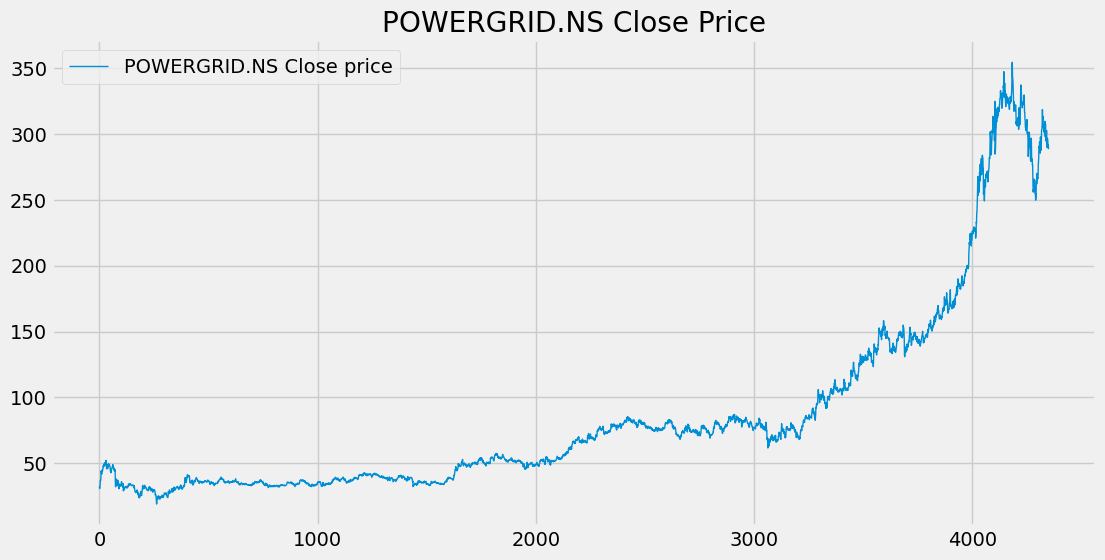

In [14]:
plt.figure(figsize= (12,6))
plt.plot(df['Close'] , label = f'{stock} Close price' , linewidth = 1)
plt.title(f'{stock} Close Price')
plt.legend()
plt.show()

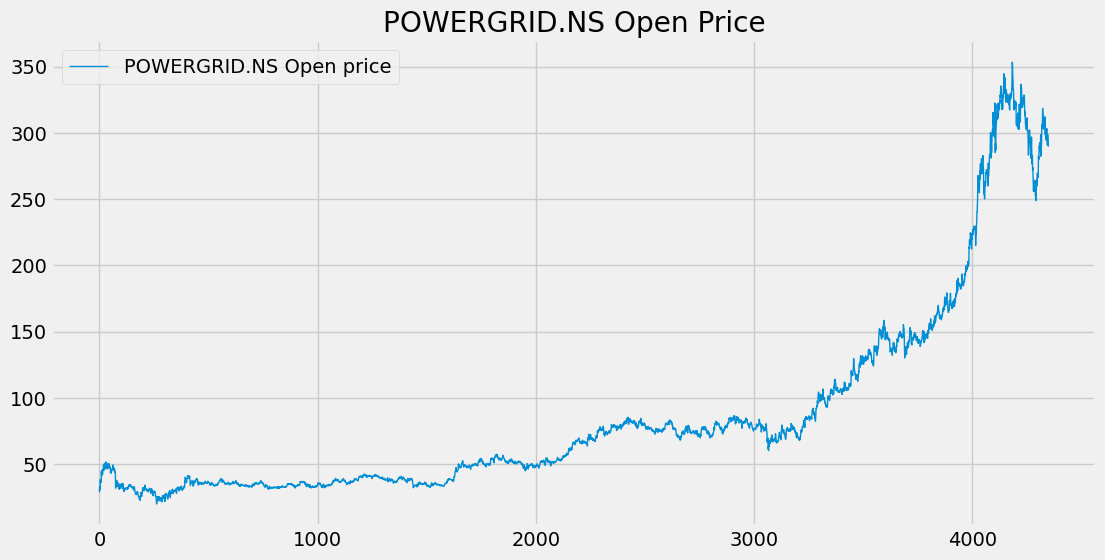

In [15]:
plt.figure(figsize= (12,6))
plt.plot(df['Open'] , label = f'{stock} Open price' , linewidth = 1)
plt.title(f'{stock} Open Price')
plt.legend()
plt.show()

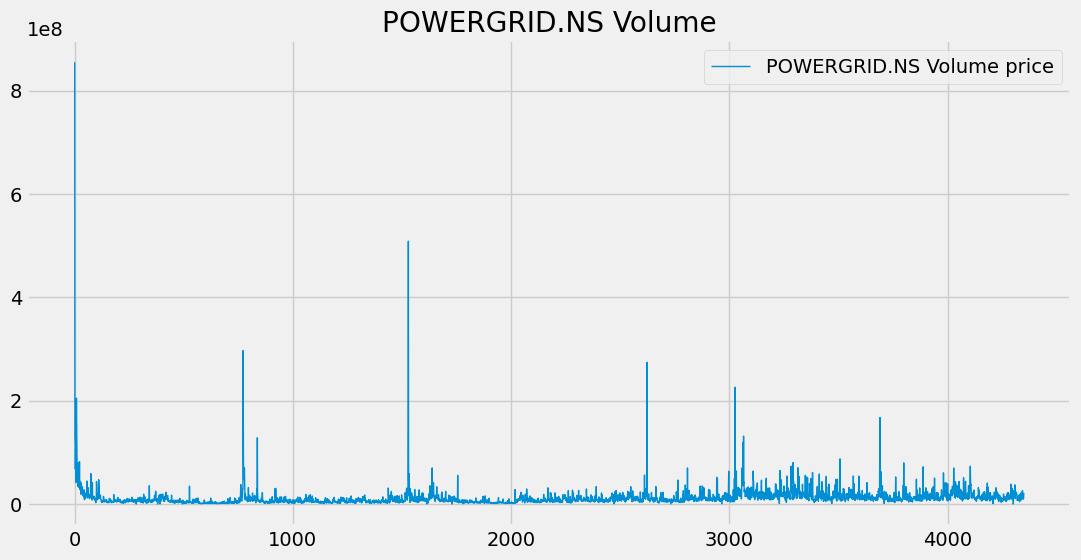

In [16]:
plt.figure(figsize= (12,6))
plt.plot(df['Volume'] , label = f'{stock} Volume price' , linewidth = 1)
plt.title(f'{stock} Volume')
plt.legend()
plt.show()

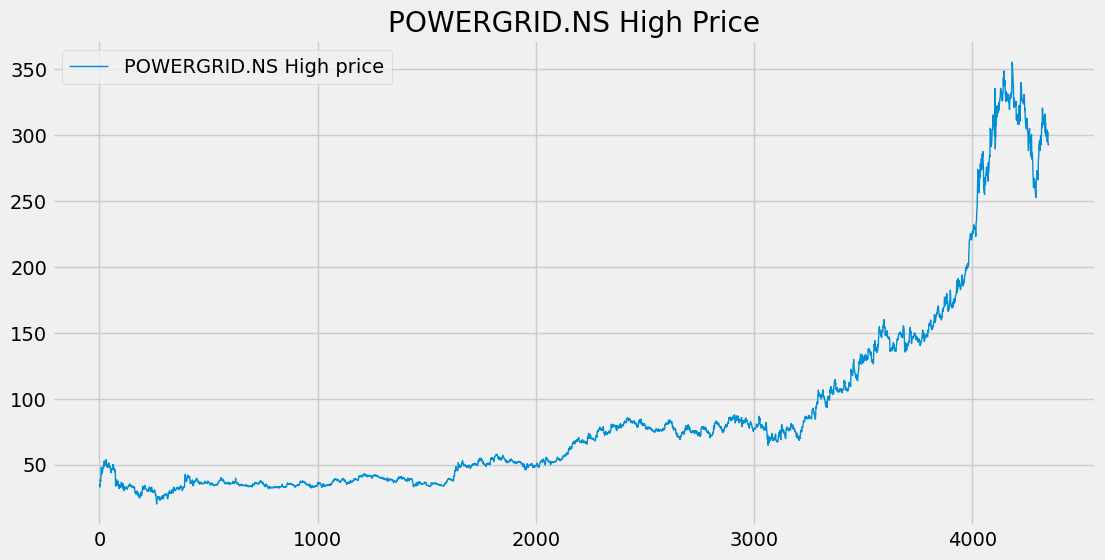

In [17]:
plt.figure(figsize= (12,6))
plt.plot(df['High'] , label = f'{stock} High price' , linewidth = 1)
plt.title(f'{stock} High Price')
plt.legend()
plt.show()

In [18]:
ma100 = df.Close.rolling(100).mean()

In [19]:
ma200 = df.Close.rolling(200).mean()

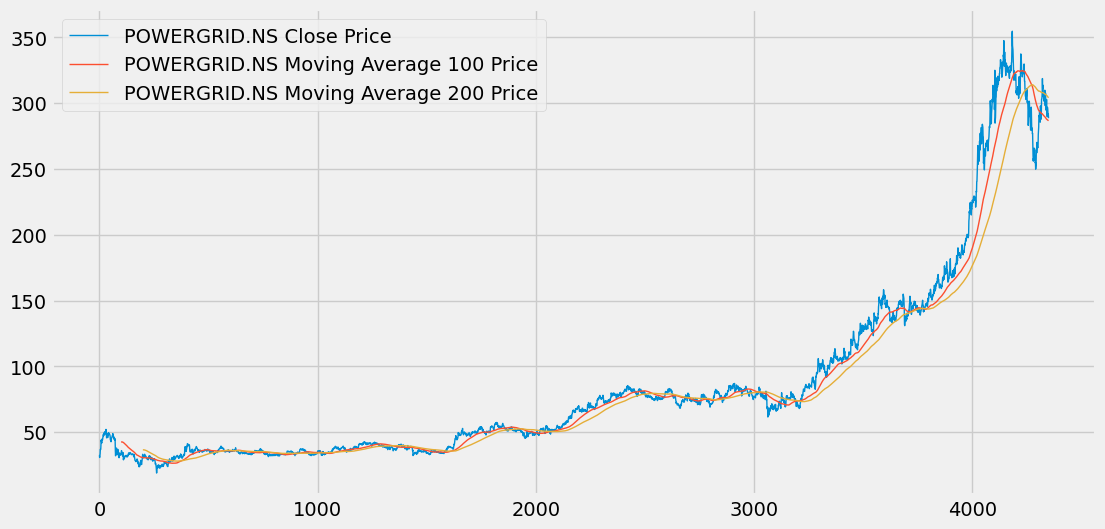

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [21]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()


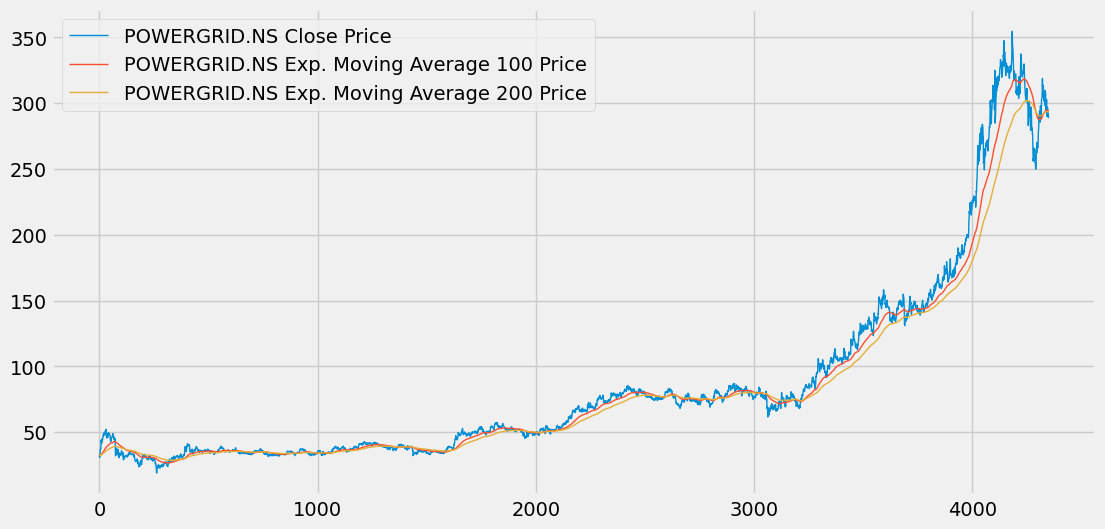

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [23]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_training_array = scaler.fit_transform(data_training)

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [25]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0975
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0106
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0087
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0076
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0069
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0067
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0059
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0067
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0063
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0051
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0047
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0056
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0044
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0061
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0038
Epo

In [29]:
past_100_days = data_training.tail(100)

In [33]:
final_df=pd.concat([past_100_days,data_testing], ignore_index = True)

In [34]:
final_df.head()

Ticker,POWERGRID.NS
0,81.766800
1,81.972504
2,81.499390
3,81.890221
4,80.841141


In [35]:
input_data = scaler.fit_transform(final_df)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [37]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step


In [38]:
scaler.scale_

array([0.00341187])

In [39]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

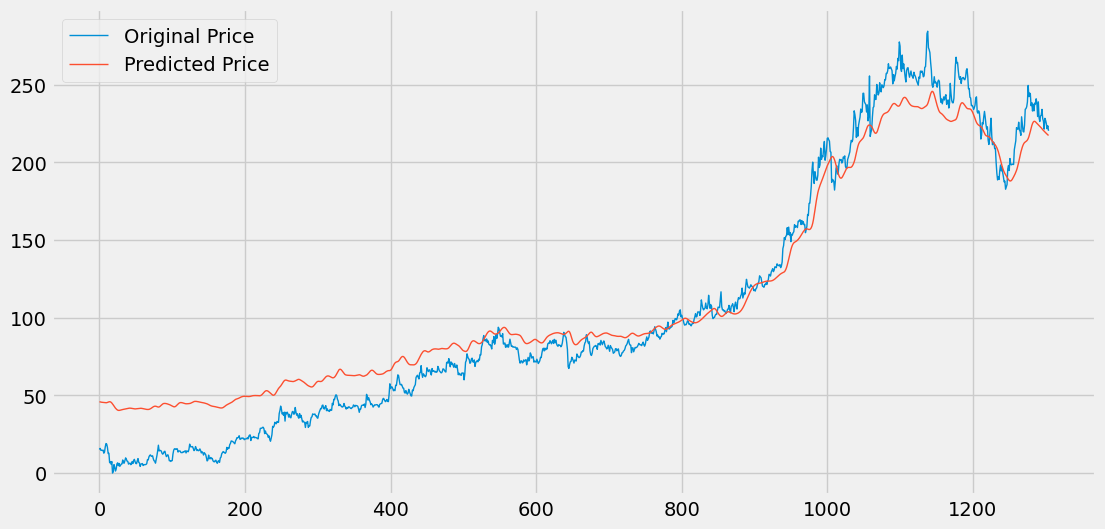

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [41]:
model.save('stock_dl_model.h5')